In [5]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings 
# Loading and plotting the CIFAR10 Dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings 

In [6]:
# Load the image into memory
(trainX, trainY), (testX, testY) = load_data()

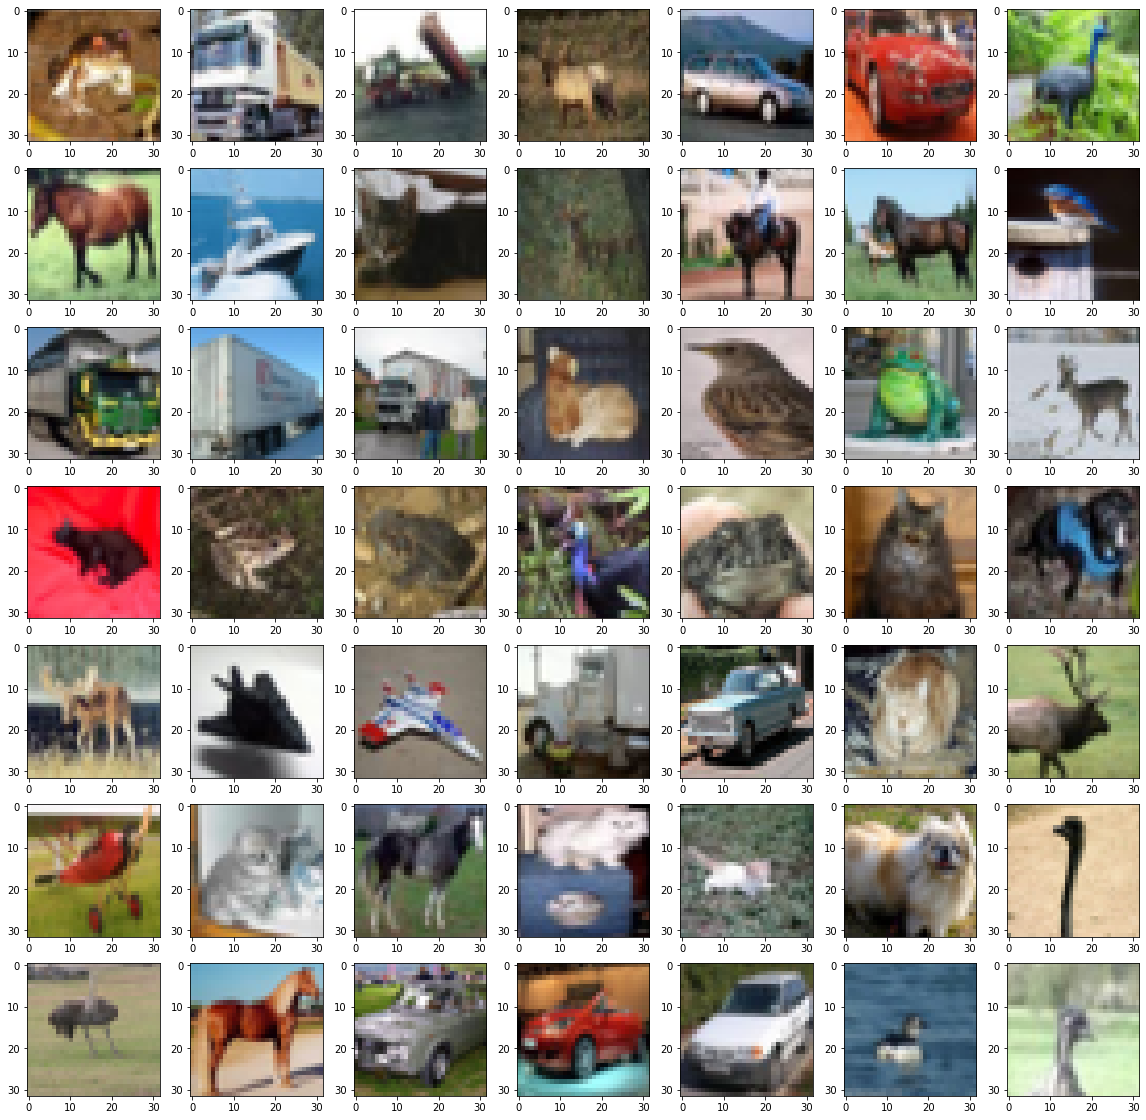

In [7]:
import numpy as np
fig, ax = plt.subplots(nrows=7,ncols=7, figsize=(20,20))
# Loop for get the images
for i in range(7):
    for j in range(7):
        idx = i * 7 + j  # Convert 2D index to a 1D index
        # Plot the image using a specific subplot
        ax[i, j].imshow(np.squeeze(trainX[idx]))
        
plt.show()
  

In [9]:
# Printing the shape of the trainX data
print(trainX.shape) # (50000, 32, 32, 3) 3 means channels: red, green, and blue (RGB).

(50000, 32, 32, 3)


**Import the dependencies**

In [46]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
# For visulize the model architecture
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Build The Discriminator

In [11]:
def build_discriminator(in_shape=(32, 32, 3)):
    model = Sequential()

    # First Convolutional block
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    # Downsample (making the image smaller by strides by 2 times)
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Downsample
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Downsample
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model


In [24]:
# installing neuralplot to visualize the data
!pip install neuralplot
import neuralplot

In [29]:
# importing modelplot
from neuralplot import ModelPlot

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 256)        

<IPython.core.display.Javascript object>


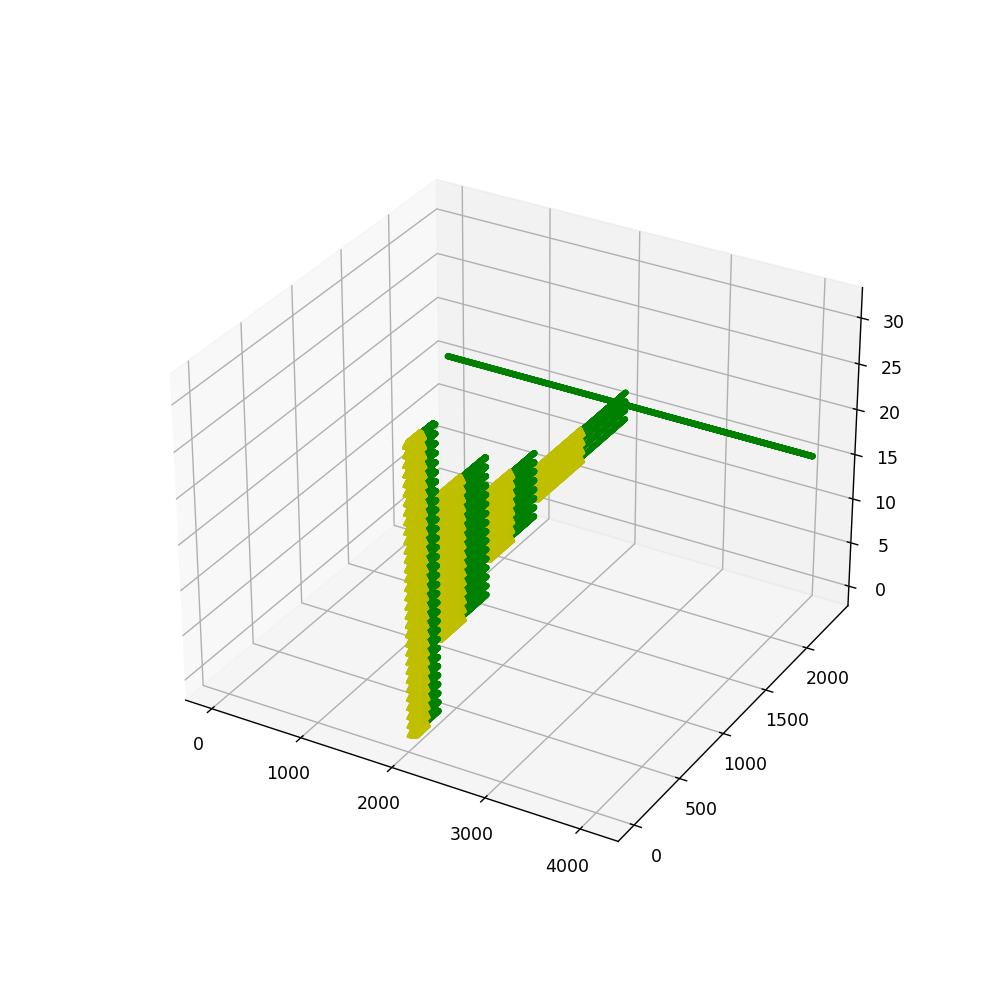

In [32]:
# Calling the discriminator model function
model = build_discriminator()
# Summarize the model
model.summary()
modelplot = ModelPlot(model=model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

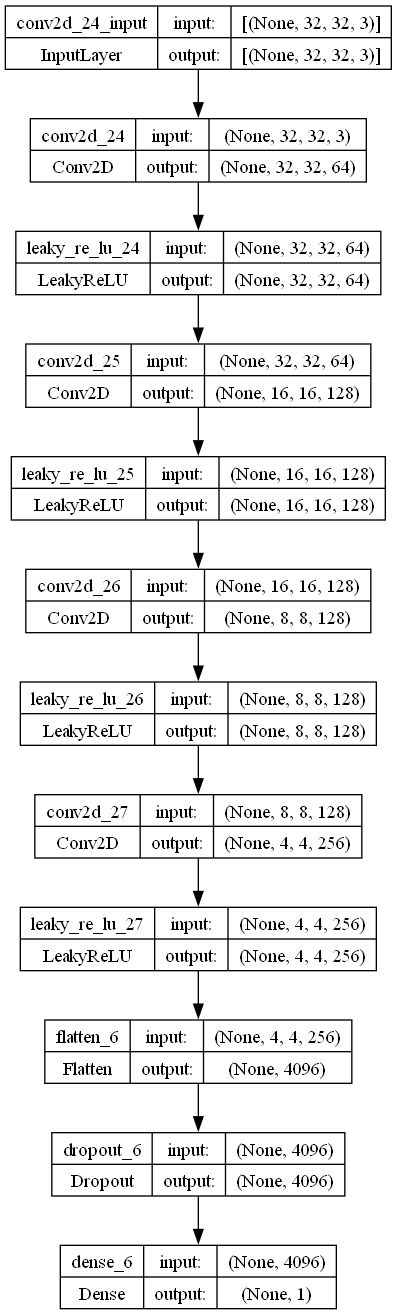

In [31]:
# Visualize the model architect
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
# Function to load only the real data set (trainX)
def load_real_samples():
    (trainx, _), ( _ , _ ) = load_data()
    # Converts from unsigned ints to floats
    X = trainX.astype('float32')
    # Scale from [0,255] to [-1,1]
    X = (X-127.5)/127.5
    return X

In [34]:
# Printing the shape of the real data samples
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [35]:
# Printing the first array data
X[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [39]:
# Select real Samples
def generate_real_samples(dataset, n_samples): # making batch 64 image per sample
    # Choose random instances
    ix = np.random.randint(0,dataset.shape[0],n_samples)
    # Retrieve selected image
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples,1))
    return X,y

In [40]:
# Printing the shape of the generated real samples (X--> data y--> labels)
X, y = generate_real_samples(X,64)
print(X.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


In [41]:
# printing the labels
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


First we will generate fake samples randomly and train the discriminator just to see how it works. Later we generate fake samples from the generator.

In [42]:
# Generate n fake samples with class labels
def generate_fake_samples(n_samples):
    # Generate uniform random number [0,1]
    X = np.random.rand(32*32*3*n_samples)
    # Update to have the range [-1,1]
    X = -1+ X*2
    # Reshape into a batch fo color images
    X = X.reshape((n_samples, 32,32,3))
    # Generate 'fake' class labels (0)
    y = np.zeros((n_samples,1))
    return X,y
    

In [43]:
# Printing the  generated fake samples
X,y = generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


<IPython.core.display.Javascript object>


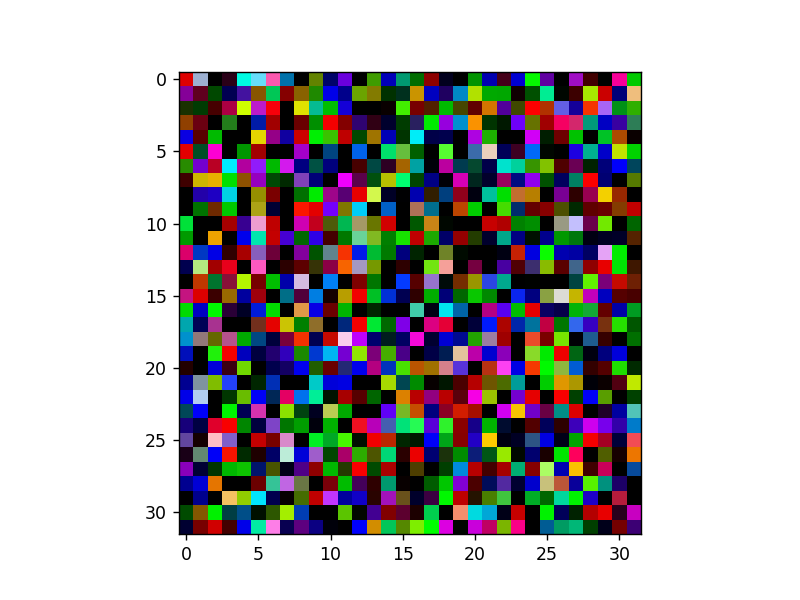

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [47]:
# Ploting the fist generated fake image
plt.imshow(X[0])

In [48]:
# train the discriminator model temporarily
def train_discriminator(model, dataset, n_iter=20,n_batch=128):
    half_batch = int(n_batch/2)
    # manually enumerate epoch
    for i in range(n_iter):
        # get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        # Update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real,y_real)
        # Generate fake image
        X_fake, y_fake =  generate_fake_samples(half_batch)
        # Update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake,y_fake)
        # summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' %(i+1, real_acc*100, fake_acc*100))


In [75]:
# Example of training
model = build_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model,dataset)

>1 real=53% fake=0%
>2 real=94% fake=2%
>3 real=94% fake=23%
>4 real=98% fake=62%
>5 real=92% fake=92%
>6 real=91% fake=100%
>7 real=94% fake=100%
>8 real=94% fake=100%
>9 real=100% fake=100%
>10 real=94% fake=100%
>11 real=94% fake=100%
>12 real=100% fake=100%
>13 real=95% fake=100%
>14 real=98% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=97% fake=100%
>18 real=100% fake=100%
>19 real=98% fake=100%
>20 real=100% fake=100%


# Build Generator

In [49]:
from keras.layers import Reshape, Conv2DTranspose

In [50]:
def build_generator(latent_dim):  
    model = Sequential()    
    
    # Block 1 --> 4x4 image
    model.add(Dense(256 * 4 * 4, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256), input_shape=(256 * 4 * 4,)))  # Define the input_shape for Reshape
    
    # Upsample to 8x8
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
              
    # Upsample to 16x16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
              
    # Upsample to 32x32
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
              
    # Output Layer
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
    return model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 8, 8, 128)         524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                          

<IPython.core.display.Javascript object>


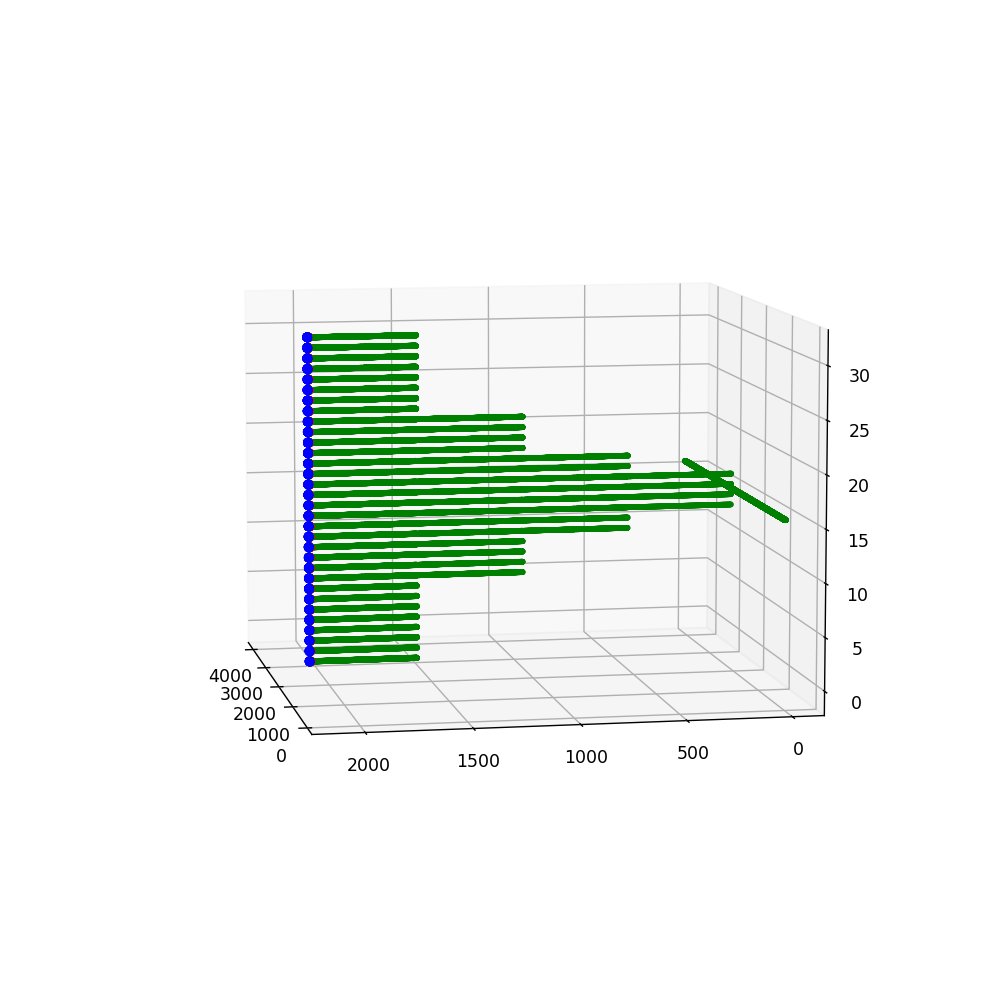

In [55]:
# Define the size of the latent space
latent_dim = 100  # Any value but standard noise 100
# Define the generator model
model= build_generator(latent_dim)
# Summarize the model
model.summary()
# 3D Visualize
modelplot = ModelPlot(model=model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

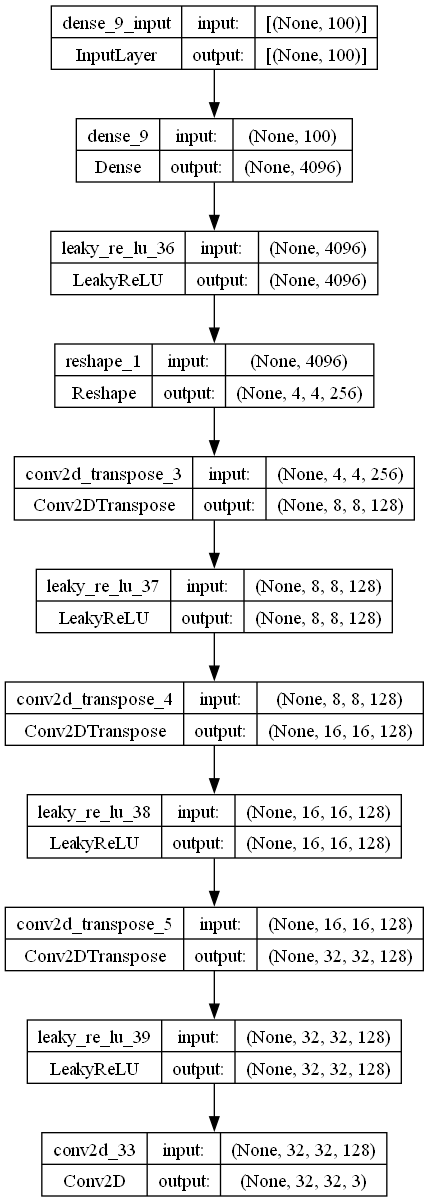

In [54]:
# Visualize the model architect
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
# Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # Generate points
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [59]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [60]:
# use the generator to generate n fake samples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # Predict output
    # 64, 32,32,3 generation from the gen to input in the discriminator
    X = g_model.predict(x_input)      
    # Create fake class labels 0
    y = np.zeros((n_samples,1))
    return X,y   

2/2 [==============================] - 3s 130ms/step


<IPython.core.display.Javascript object>


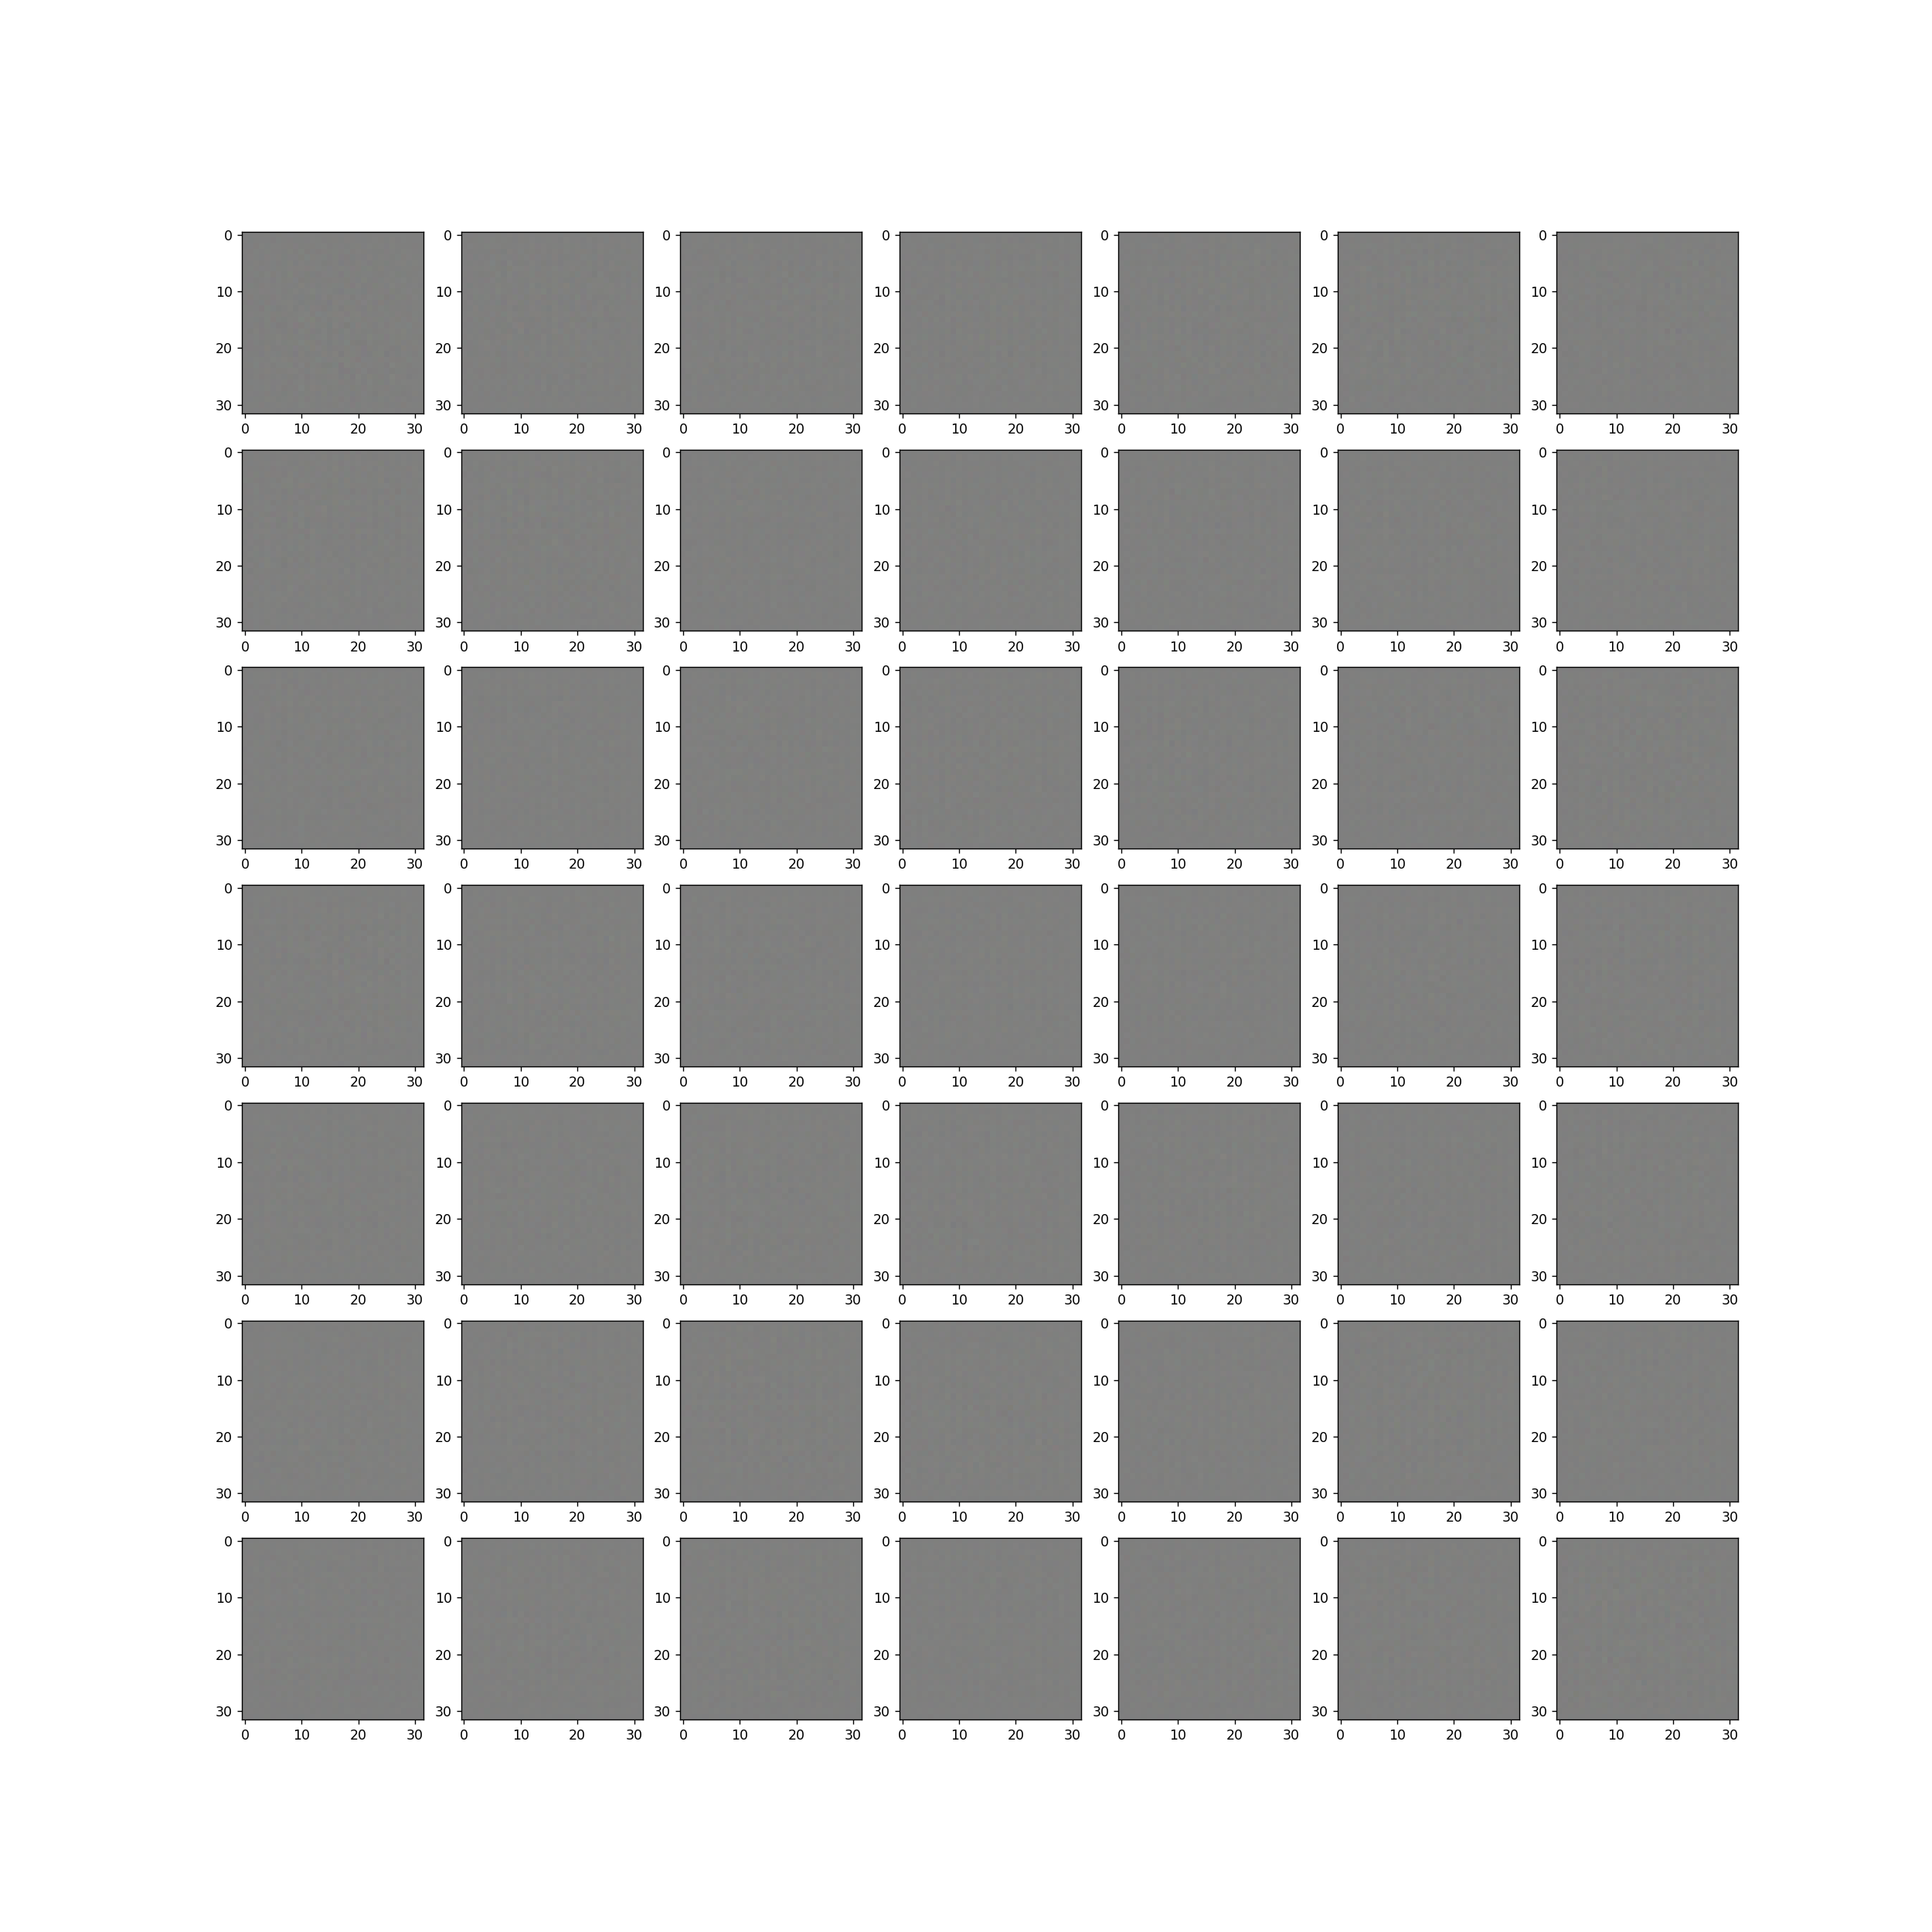

In [61]:
# Size of the latent space
latent_dim = 100
# Define the generator model
model = build_generator(latent_dim)
# generate samples
n_samples = 49
X,_ = generate_fake_samples(model,latent_dim,n_samples)
# Scale pixel values from [-1,1] to [0,1]
X = (X+1)/2.0
# Plot the generated samples
fig, ax = plt.subplots(nrows=7,ncols=7, figsize=(20,20))
# Loop for get the images
for i in range(7):
    for j in range(7):
        idx = i * 7 + j  # Convert 2D index to a 1D index
        # Plot the image using a specific subplot
        ax[i, j].imshow(np.squeeze(X[idx]))
        
plt.show()

# GAN Formation

In [62]:
# define the combined generator and discriminator model for updating generator
def build_gen(g_model,d_model):
    # make weights in the discriminator not the trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add discriminator
    model.add(d_model)
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model  
    

In [63]:
# size of the latent space
latent_dim = 100
# Create the discriminator
d_model = build_discriminator()
# Create the generator
g_model =  build_generator(latent_dim)
# Create the gan
gan_model = build_gen(g_model,d_model)
# Summarize the gan_model
gan_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_12 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


<IPython.core.display.Javascript object>


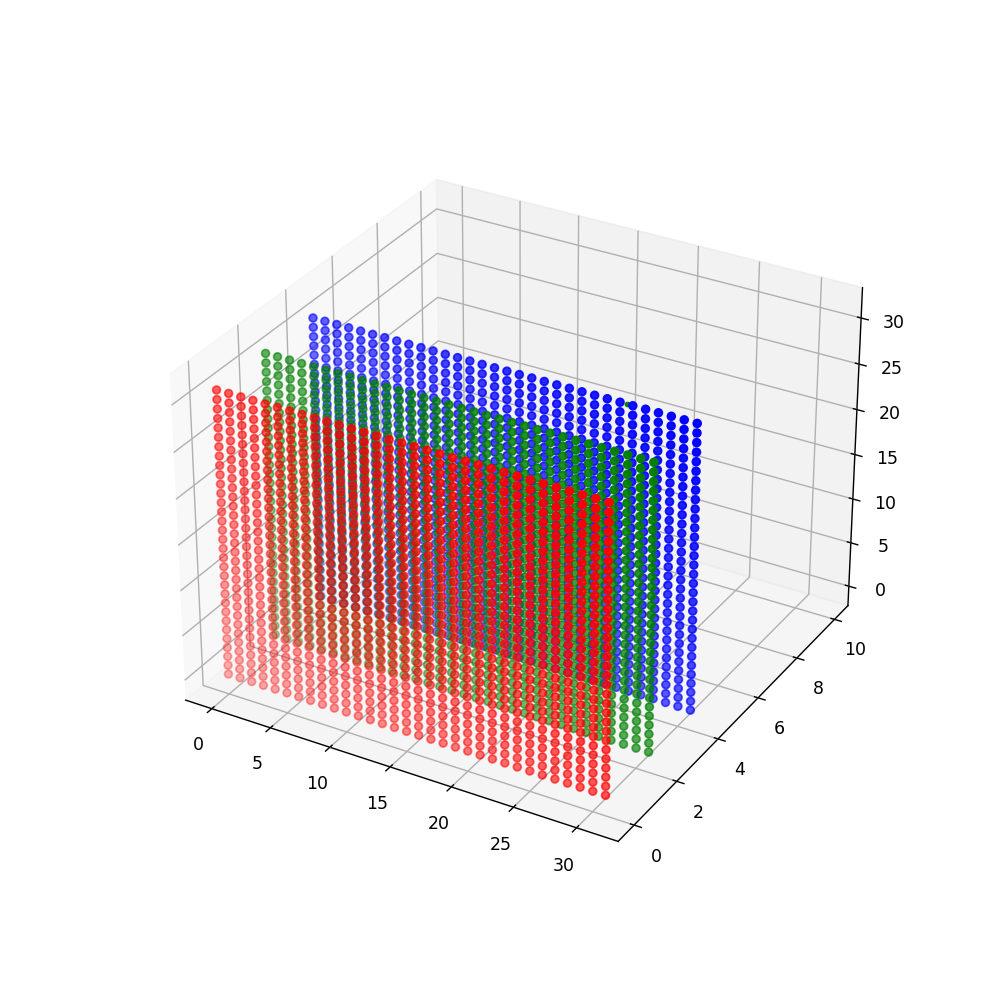

In [64]:
# 3D Visualize
modelplot = ModelPlot(model=gan_model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

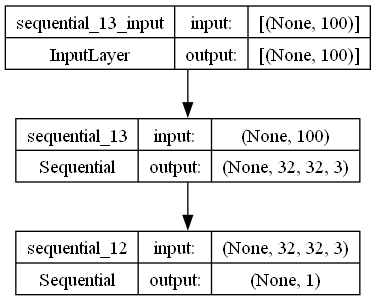

In [65]:
# Visualize the model architect
plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)

# Train The generator and discriminator

In [105]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs, n_batch=128):
    batch_per_epochs = int(dataset.shape[0]/n_batch)
    half_batch= int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(batch_per_epochs):  # batch per epochs = 399 & weigts update 399 times
            # Get randomly selected real image
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real,y_real) # _ is accuracy
            # Generate fake samples from the generator
            X_fake, y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
            # Update the discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake,y_fake)
            # Prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # Create inverted label for the fake samples
            y_gan = np.ones((n_batch,1))
            # update the generator via discriminator error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%0.3f, d2=%0.3f g=%0.3f' %
                 (i+1, j+1, batch_per_epochs,d_loss1, d_loss2, g_loss))
            # evaluate the model performance
            if (i+1) % 10 ==0:
                summarize_performance(i,g_model,d_model, dataset,latent_dim)           
            
            

In [106]:
# Evaluate the discriminator, plot images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)
    # save the generator model file
    filename = 'generator_model_%03d.h4' % (epoch+1)
    g_model.save(filename)


In [107]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
    # scale from [-1,1] to [0,1]
    examples = (examples + 1) / 2.0
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i])
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)